### PROBLEM STATEMENT
*"Implement pre-trained GoogleNet, and ResNet to perform classification
using with and without trainable layers"*

- Ayushmaan Das (E0121037)

### Importing the Modules

In [44]:
from keras.applications import ResNet50
from keras.applications.inception_v3 import InceptionV3

import numpy as np, pandas as pd, matplotlib.pyplot as plt, random

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import preprocess_input

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

<hr>

### Loading the Cifar10 Dataset

In [45]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

print(X_train.shape)
print(X_val.shape)

print(y_train.shape)
print(y_val.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


<hr>

### Pre-Processing of the Dataset

In [47]:
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

One Hot Encoding of target column

In [48]:
y_train = to_categorical(y_train,10)
y_val = to_categorical(y_val,10)
y_test = to_categorical(y_test,10)

y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### Loading the pre-built models

Resnet 50 Model

In [49]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

Inception V3 (Google Net)

In [50]:
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

<hr>

### Without Trainable Layers

- using the existing Keras VGG-16 Model
- can't update or customize weights and parameters at various layers

Freezing the pre-built layers

In [53]:
for layer in resnet_model.layers:
    layer.trainable = False

In [54]:
for layer in inception_model.layers:
    layer.trainable = False

Defining our New Architecture

In [55]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

model_resnet = Sequential()

model_resnet.add(resnet_model)

model_resnet.add(Flatten())

model_resnet.add(Dense(512, activation='relu'))

model_resnet.add(Dense(10, activation='softmax'))  # Output layer with 10 classes for CIFAR-10

model_resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
model_inception = Sequential()

model_inception.add(inception_model)

model_inception.add(Flatten())

model_inception.add(Dense(1024, activation='relu'))

model_inception.add(Dense(10, activation='softmax'))  # Output layer with 10 classes for CIFAR-10

model_inception.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Model Training

In [67]:
hist1 = model_resnet.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
547/547 [==============================] - 10s 18ms/step - loss: 0.1295 - accuracy: 0.9553 - val_loss: 2.1207 - val_accuracy: 0.6383
Epoch 2/10
547/547 [==============================] - 9s 16ms/step - loss: 0.1029 - accuracy: 0.9652 - val_loss: 2.3201 - val_accuracy: 0.6330
Epoch 3/10
547/547 [==============================] - 9s 16ms/step - loss: 0.0992 - accuracy: 0.9673 - val_loss: 2.5295 - val_accuracy: 0.6384
Epoch 4/10
547/547 [==============================] - 10s 18ms/step - loss: 0.1078 - accuracy: 0.9643 - val_loss: 2.5449 - val_accuracy: 0.6320
Epoch 5/10
547/547 [==============================] - 10s 18ms/step - loss: 0.1106 - accuracy: 0.9633 - val_loss: 2.5829 - val_accuracy: 0.6378
Epoch 6/10
547/547 [==============================] - 10s 18ms/step - loss: 0.0764 - accuracy: 0.9738 - val_loss: 2.6730 - val_accuracy: 0.6430
Epoch 7/10
547/547 [==============================] - 9s 17ms/step - loss: 0.0621 - accuracy: 0.9797 - val_loss: 2.8896 - val_accuracy: 0.

Resizing because Inception Models need a minimum 75 x 75 dimension

In [59]:
from tensorflow.image import resize

X_train_resized = resize(X_train, size=(75, 75))
X_test_resized = resize(X_test, size=(75, 75))
X_val_resized = resize(X_val, size=(75, 75))

X_train_resized.shape

TensorShape([35000, 75, 75, 3])

In [66]:
hist2 = model_inception.fit(X_train_resized, y_train, batch_size=64, epochs=10, validation_data=(X_val_resized, y_val))

Epoch 1/10
547/547 [==============================] - 16s 29ms/step - loss: 1.7861 - accuracy: 0.3643 - val_loss: 3.2159 - val_accuracy: 0.1508
Epoch 2/10
547/547 [==============================] - 15s 28ms/step - loss: 1.7709 - accuracy: 0.3691 - val_loss: 3.8889 - val_accuracy: 0.1296
Epoch 3/10
547/547 [==============================] - 16s 30ms/step - loss: 1.7681 - accuracy: 0.3687 - val_loss: 2.6803 - val_accuracy: 0.1564
Epoch 4/10
547/547 [==============================] - 16s 30ms/step - loss: 1.7620 - accuracy: 0.3689 - val_loss: 3.1941 - val_accuracy: 0.1541
Epoch 5/10
547/547 [==============================] - 16s 30ms/step - loss: 1.7542 - accuracy: 0.3738 - val_loss: 3.3074 - val_accuracy: 0.1492
Epoch 6/10
547/547 [==============================] - 15s 28ms/step - loss: 1.7452 - accuracy: 0.3760 - val_loss: 3.4007 - val_accuracy: 0.1355
Epoch 7/10
547/547 [==============================] - 16s 30ms/step - loss: 1.7365 - accuracy: 0.3819 - val_loss: 3.4765 - val_accuracy:

Accuracy and Predictions

In [68]:
score = model_resnet.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

Test loss: 3.0770623683929443
Test accuracy: 0.6348000168800354


In [69]:
score = model_inception.evaluate(X_test_resized, y_test, verbose=0)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

Test loss: 1.8781983852386475
Test accuracy: 0.33809998631477356


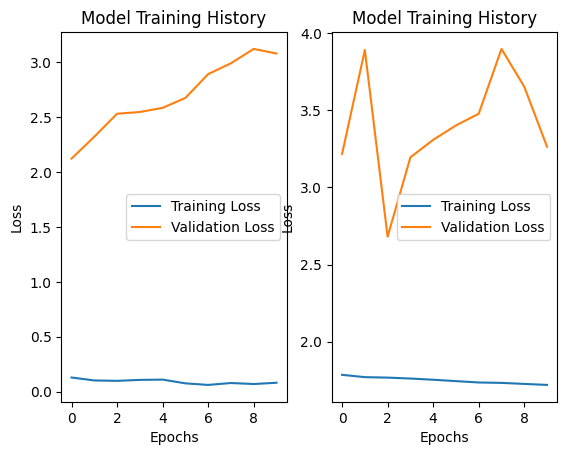

In [70]:
plt.subplot(1,2,1)
plt.plot(hist1.history['loss'], label='Training Loss')
plt.plot(hist1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training History')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist2.history['loss'], label='Training Loss')
plt.plot(hist2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training History')
plt.legend()
plt.show()

<hr>

### Making few selective layers trainable


- Unfreezing few base layers
- The selcted layers of the frozen model will undergo weight updation

In [77]:
trainable_layers_resnet = ['conv2_block1_1_relu', 'conv2_block1_1_relu', 'conv2_block1_1_relu', 'conv2_block1_1_relu', 'conv4_block6_2_conv']

trainable_layers_inception = ['conv2d_156', 'conv2d_95', 'conv2d_111', 'conv2d_130', 'conv2d_169']

In [78]:
for layer in resnet_model.layers:
  if layer.name in trainable_layers_resnet:
    layer.set_trainable = True

In [79]:
for layer in inception_model.layers:
  if layer.name in trainable_layers_inception:
    layer.set_trainable = True

Model building and training

In [80]:
model_resnet_a = Sequential()

model_resnet_a.add(resnet_model)

model_resnet_a.add(Flatten())

model_resnet_a.add(Dense(512, activation='relu'))

model_resnet_a.add(Dense(10, activation='softmax'))  # Output layer with 10 classes for CIFAR-10

model_resnet_a.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

hist1_a = model_resnet_a.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
547/547 [==============================] - 14s 20ms/step - loss: 1.2363 - accuracy: 0.5956 - val_loss: 1.0227 - val_accuracy: 0.6404
Epoch 2/10
547/547 [==============================] - 10s 18ms/step - loss: 0.8607 - accuracy: 0.6986 - val_loss: 1.0237 - val_accuracy: 0.6504
Epoch 3/10
547/547 [==============================] - 9s 16ms/step - loss: 0.7088 - accuracy: 0.7480 - val_loss: 1.0878 - val_accuracy: 0.6479
Epoch 4/10
547/547 [==============================] - 10s 18ms/step - loss: 0.5703 - accuracy: 0.7977 - val_loss: 1.1414 - val_accuracy: 0.6523
Epoch 5/10
547/547 [==============================] - 10s 18ms/step - loss: 0.4439 - accuracy: 0.8431 - val_loss: 1.2259 - val_accuracy: 0.6431
Epoch 6/10
547/547 [==============================] - 9s 16ms/step - loss: 0.3315 - accuracy: 0.8825 - val_loss: 1.3653 - val_accuracy: 0.6414
Epoch 7/10
547/547 [==============================] - 10s 19ms/step - loss: 0.2534 - accuracy: 0.9106 - val_loss: 1.4935 - val_accuracy: 0

In [83]:
model_inception_a = Sequential()

model_inception_a.add(inception_model)

model_inception_a.add(Flatten())

model_inception_a.add(Dense(1024, activation='relu'))

model_inception_a.add(Dense(10, activation='softmax'))  # Output layer with 10 classes for CIFAR-10

model_inception_a.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

hist2_a = model_inception.fit(X_train_resized, y_train, batch_size=64, epochs=10, validation_data=(X_val_resized, y_val))

Epoch 1/10
547/547 [==============================] - 17s 31ms/step - loss: 1.7162 - accuracy: 0.3882 - val_loss: 3.4165 - val_accuracy: 0.1525
Epoch 2/10
547/547 [==============================] - 17s 31ms/step - loss: 1.7153 - accuracy: 0.3863 - val_loss: 3.2350 - val_accuracy: 0.1521
Epoch 3/10
547/547 [==============================] - 17s 30ms/step - loss: 1.7119 - accuracy: 0.3918 - val_loss: 3.1980 - val_accuracy: 0.1513
Epoch 4/10
547/547 [==============================] - 16s 29ms/step - loss: 1.7040 - accuracy: 0.3940 - val_loss: 3.1837 - val_accuracy: 0.1488
Epoch 5/10
547/547 [==============================] - 17s 30ms/step - loss: 1.7015 - accuracy: 0.3934 - val_loss: 3.2987 - val_accuracy: 0.1497
Epoch 6/10
547/547 [==============================] - 17s 30ms/step - loss: 1.6974 - accuracy: 0.3960 - val_loss: 4.0520 - val_accuracy: 0.1339
Epoch 7/10
547/547 [==============================] - 16s 30ms/step - loss: 1.6908 - accuracy: 0.4003 - val_loss: 3.8680 - val_accuracy:

Accuracy and Predictions

In [82]:
score = model_resnet_a.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

Test loss: 1.9866441488265991
Test accuracy: 0.6428999900817871


In [84]:
score = model_inception.evaluate(X_test_resized, y_test, verbose=0)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

Test loss: 1.9178259372711182
Test accuracy: 0.33399999141693115


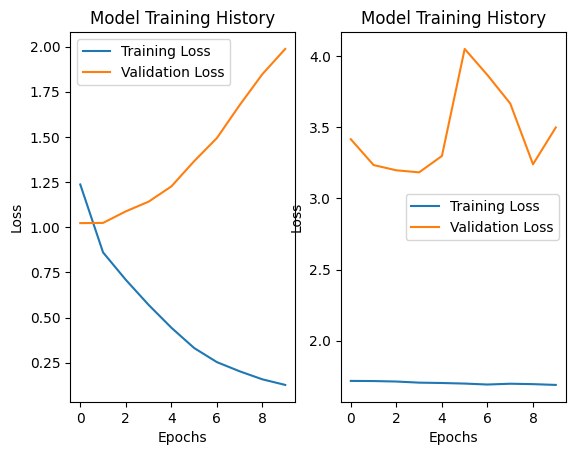

In [85]:
plt.subplot(1,2,1)
plt.plot(hist1_a.history['loss'], label='Training Loss')
plt.plot(hist1_a.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training History')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist2_a.history['loss'], label='Training Loss')
plt.plot(hist2_a.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training History')
plt.legend()
plt.show()

<hr><hr>